MAT245 Lab 2

Markov Chain

In [4]:
import numpy as np

n = 3
m = 3

P_unscaled = np.random.rand(n, m)
row_sums = P_unscaled.sum(axis = 1).reshape(3,1)
P = P_unscaled / row_sums


X_0 = np.array([0.0, 1.0, 0.0])
X_5 = X_0.dot(np.linalg.matrix_power(P, 5))
X_7 = X_0.dot(np.linalg.matrix_power(P, 7))
print X_5
print X_7


[ 0.46091253  0.33116175  0.20792572]
[ 0.46116047  0.33093573  0.2079038 ]


2D Norms

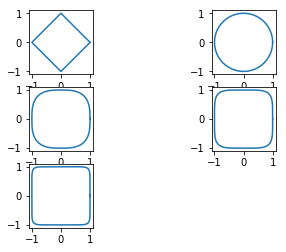

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def pwr(n, p):
  return n ** p

def p_norm(point, p):
  return abs(pwr (abs(pwr(point[0], float(p))) + abs(pwr(point[1], float(p))),  1.0/float(p)))

def compare_by_x(x, y):
  if x[0] < y[0]:
    return 1
  elif x[0] > y[0]:
    return -1
  else: 
    return 0

def saparateForPlotting(datapoints, p):
  # scaling
  P = P_unscaled / np.array( map( lambda list : p_norm(list, p),  P_unscaled )).reshape(m, 1)
  P_Top = filter(lambda x : x[1] > 0, P)
  P_Down = filter(lambda x : x[1] < 0, P)
  P_Top = sorted(P_Top, compare_by_x)
  P_Down = sorted(P_Down, compare_by_x, reverse = True)
  P = P_Top + P_Down
  Ptranspose = np.transpose(P)
  return Ptranspose.copy()

#number of sampling
m = 1000
#sample in a square around origin
P_unscaled = np.random.rand(m, 2) - 0.5


p_norms = [1, 2, 3, 5, 10]

plt.figure(1)

for i in p_norms:
  j = p_norms.index(i)
  plt.subplot(321 + j)
  P = saparateForPlotting(P_unscaled, i)
  plt.plot(P[0], P[1])
  plt.gca().set_aspect('equal', adjustable='box')


plt.show()
